In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load the datasets with absolute paths
kc_house_data = pd.read_csv('../data/raw/kc_house_data.csv')
zipcode_demographics = pd.read_csv('../data/raw/zipcode_demographics.csv')

# Exploratorial Analysis 
From the dataset of house pricing and nd demographics data
## Overview of the datasets
Understanding the structure and content of the datasets.

In [ ]:


print("kc_house_data loaded with shape:", kc_house_data.shape)
print("zipcode_demographics loaded with shape:", zipcode_demographics.shape)

# Configure pandas to display all columns and rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', 1000)

print("Pandas display options configured to show all columns and rows.")
print("\n--- First 5 rows of kc_house_data with full display ---")
print(kc_house_data.head())

print("\n--- First 5 rows of zipcode_demographics with full display ---")
print(zipcode_demographics.head())


kc_house_data loaded with shape: (21613, 21)
zipcode_demographics loaded with shape: (70, 27)
Pandas display options configured to show all columns and rows.

--- First 5 rows of kc_house_data with full display ---
           id             date     price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15
0  7129300520  20141013T000000  221900.0         3       1.00         1180      5650     1.0           0     0          3      7        1180              0      1955             0    98178  47.5112 -122.257           1340        5650
1  6414100192  20141209T000000  538000.0         3       2.25         2570      7242     2.0           0     0          3      7        2170            400      1951          1991    98125  47.7210 -122.319           1690        7639
2  5631500400  20150225T000000  180000.0         2       1.00          770     1000

# Data Type Verification

Let's inspect the data types of both dataframes to identify columns that might require conversion, especially date-related fields.

In [33]:
print("\n--- kc_house_data Info ---")
kc_house_data.info()

print("\n--- zipcode_demographics Info ---")
zipcode_demographics.info()
zipcode_demographics.info()



--- kc_house_data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 n

# Date Column Conversion

The 'date' column in `kc_house_data` is currently an object type. We need to convert it to a datetime object for proper time-series analysis.

In [34]:
kc_house_data['date'] = pd.to_datetime(kc_house_data['date'])
print("\n--- kc_house_data Info after date conversion ---")
kc_house_data.info()


--- kc_house_data Info after date conversion ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21613 non-null  int64         
 1   date           21613 non-null  datetime64[ns]
 2   price          21613 non-null  float64       
 3   bedrooms       21613 non-null  int64         
 4   bathrooms      21613 non-null  float64       
 5   sqft_living    21613 non-null  int64         
 6   sqft_lot       21613 non-null  int64         
 7   floors         21613 non-null  float64       
 8   waterfront     21613 non-null  int64         
 9   view           21613 non-null  int64         
 10  condition      21613 non-null  int64         
 11  grade          21613 non-null  int64         
 12  sqft_above     21613 non-null  int64         
 13  sqft_basement  21613 non-null  int64         
 14  yr_built       21613

# Missing Data Analysis

Next, we will check for any missing values (NaNs) in both `kc_house_data` and `zipcode_demographics` and decide on an appropriate strategy for handling them.

In [35]:
print("\n--- Missing values in kc_house_data ---")
print(kc_house_data.isnull().sum())

print("\n--- Missing values in zipcode_demographics ---")
print(zipcode_demographics.isnull().sum())


--- Missing values in kc_house_data ---
id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

--- Missing values in zipcode_demographics ---
ppltn_qty                 0
urbn_ppltn_qty            0
sbrbn_ppltn_qty           0
farm_ppltn_qty            0
non_farm_qty              0
medn_hshld_incm_amt       0
medn_incm_per_prsn_amt    0
hous_val_amt              0
edctn_less_than_9_qty     0
edctn_9_12_qty            0
edctn_high_schl_qty       0
edctn_some_clg_qty        0
edctn_assoc_dgre_qty      0
edctn_bchlr_dgre_qty      0
edctn_prfsnl_qty          0
per_urbn                  0
per_sbrbn                 0
per_farm               

# Handling Missing Data

Based on the analysis, neither `kc_house_data` nor `zipcode_demographics` contain any missing values. Therefore, no specific treatment (e.g., removal or imputation) for missing data is necessary at this stage.

# Entendimento Profundo: Documente Cada Variável

Nesta seção, documentaremos cada variável presente nos dataframes `kc_house_data` e `zipcode_demographics` para um entendimento aprofundado dos dados.

 ## Justification of Merge Strategy 

A left merge was chosen to ensure that all records from the `kc_house_data` dataframe are retained.
This is crucial because `kc_house_data` contains the primary information about house sales, and we want to enrich it with demographic data without losing any house sale records.
Any zipcodes in `kc_house_data` that do not have a match in `zipcode_demographics` will have NaN values for the demographic columns, which can be handled in subsequent steps if necessary.

In [36]:
# Perform the merge
initial_kc_house_data_rows = kc_house_data.shape[0]
kc_house_data = pd.merge(kc_house_data, zipcode_demographics, on='zipcode', how='left')
merged_kc_house_data_rows = kc_house_data.shape[0]

print("\n--- Merge Analysis ---")
print(f"Initial kc_house_data rows: {initial_kc_house_data_rows}")
print(f"Merged kc_house_data rows: {merged_kc_house_data_rows}")

if initial_kc_house_data_rows == merged_kc_house_data_rows:
    print("No data loss detected in kc_house_data after merge.")
else:
    print(f"Data loss detected: {initial_kc_house_data_rows - merged_kc_house_data_rows} rows lost.")

print("\n--- First 5 rows of merged kc_house_data with full display ---")
print(kc_house_data.head())


--- Merge Analysis ---
Initial kc_house_data rows: 21613
Merged kc_house_data rows: 21613
No data loss detected in kc_house_data after merge.

--- First 5 rows of merged kc_house_data with full display ---
           id       date     price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  ppltn_qty  urbn_ppltn_qty  sbrbn_ppltn_qty  farm_ppltn_qty  non_farm_qty  medn_hshld_incm_amt  medn_incm_per_prsn_amt  hous_val_amt  edctn_less_than_9_qty  edctn_9_12_qty  edctn_high_schl_qty  edctn_some_clg_qty  edctn_assoc_dgre_qty  edctn_bchlr_dgre_qty  edctn_prfsnl_qty  per_urbn  per_sbrbn  per_farm  per_non_farm  per_less_than_9  per_9_to_12  per_hsd  per_some_clg  per_assoc  per_bchlr  per_prfsnl
0  7129300520 2014-10-13  221900.0         3       1.00         1180      5650     1.0           0     0          3      7        1180              0      195

# Price Distribution Analysis

Let's visualize the distribution of house prices in the `kc_house_data` to understand its spread and identify any potential outliers or skewness.

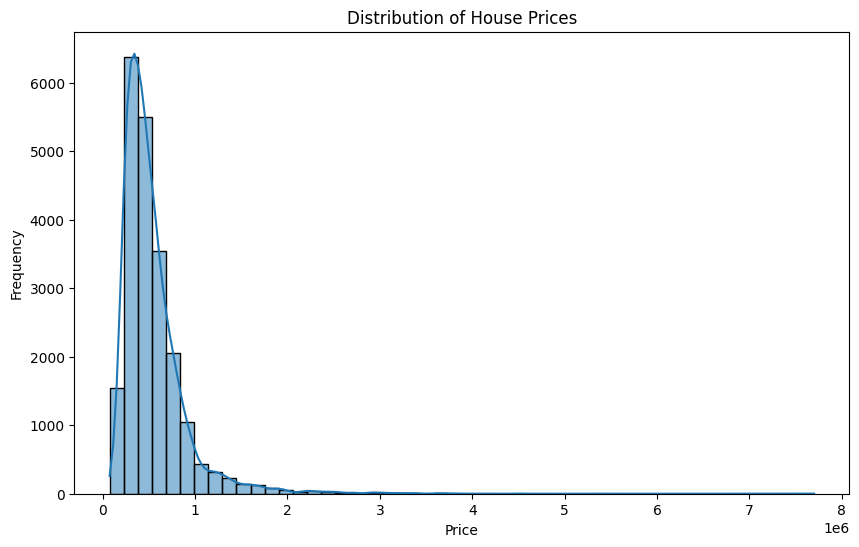

In [40]:
plt.figure(figsize=(10, 6))
sns.histplot(kc_house_data['price'], bins=50, kde=True)
plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

Using the logarithm of house prices provides a more stable and interpretable target for modeling. Since housing prices are typically right-skewed, the log transformation reduces the influence of extreme outliers and makes the distribution closer to normal. This helps linear and tree-based models capture relative percentage changes rather than absolute differences, improving both accuracy and interpretability. 

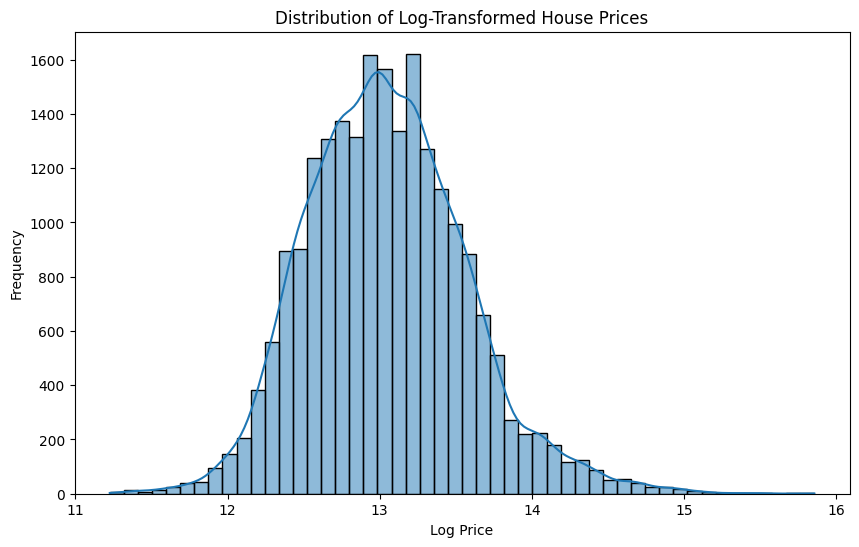

In [ ]:
kc_house_data["log_price"] = np.log1p(kc_house_data["price"])

plt.figure(figsize=(10, 6))
sns.histplot(kc_house_data["log_price"], bins=50, kde=True)
plt.title("Distribution of Log-Transformed House Prices")
plt.xlabel("Log Price")
plt.ylabel("Frequency")
plt.show()


## Ploting the he correlation matrix and top correlations with price

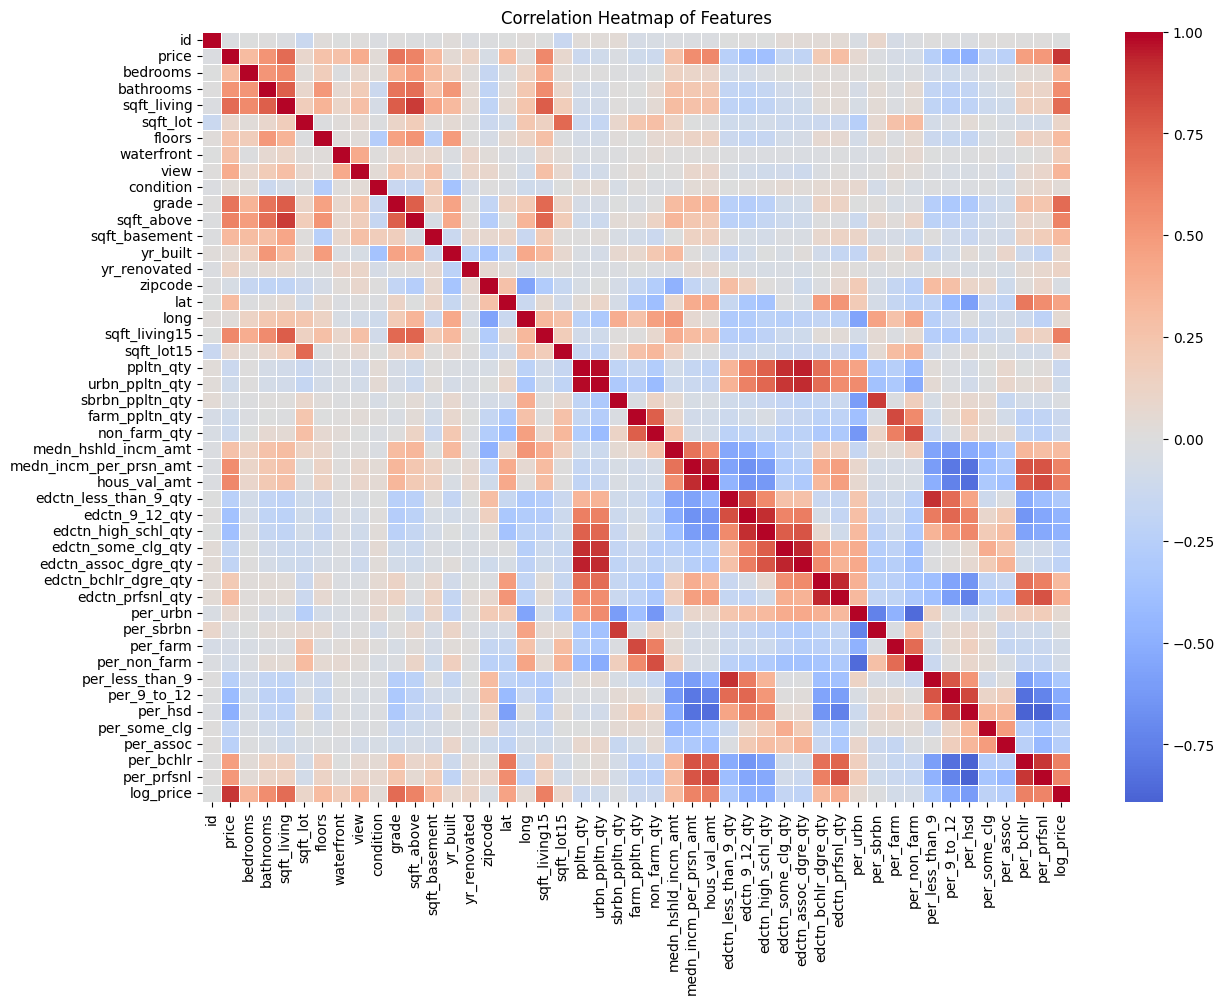

log_price                 1.000000
price                     0.891654
grade                     0.703634
sqft_living               0.695341
hous_val_amt              0.630819
sqft_living15             0.619312
per_bchlr                 0.611398
medn_incm_per_prsn_amt    0.605374
sqft_above                0.601802
per_prfsnl                0.599432
bathrooms                 0.550802
lat                       0.449174
edctn_prfsnl_qty          0.393077
view                      0.346522
bedrooms                  0.343561
Name: log_price, dtype: float64
price                     1.000000
log_price                 0.891654
sqft_living               0.702035
grade                     0.667434
sqft_above                0.605567
sqft_living15             0.585379
hous_val_amt              0.579733
medn_incm_per_prsn_amt    0.549911
bathrooms                 0.525138
per_prfsnl                0.500262
per_bchlr                 0.474896
view                      0.397293
sqft_basement          

In [ ]:
plt.figure(figsize=(14, 10))
corr = kc_house_data.corr(numeric_only=True)

sns.heatmap(corr, cmap="coolwarm", center=0, linewidths=0.5)
plt.title("Correlation Heatmap of Features")
plt.show()

# Top correlations with price
print(corr["log_price"].sort_values(ascending=False).head(15))


## Checking the price distribution by by zip code

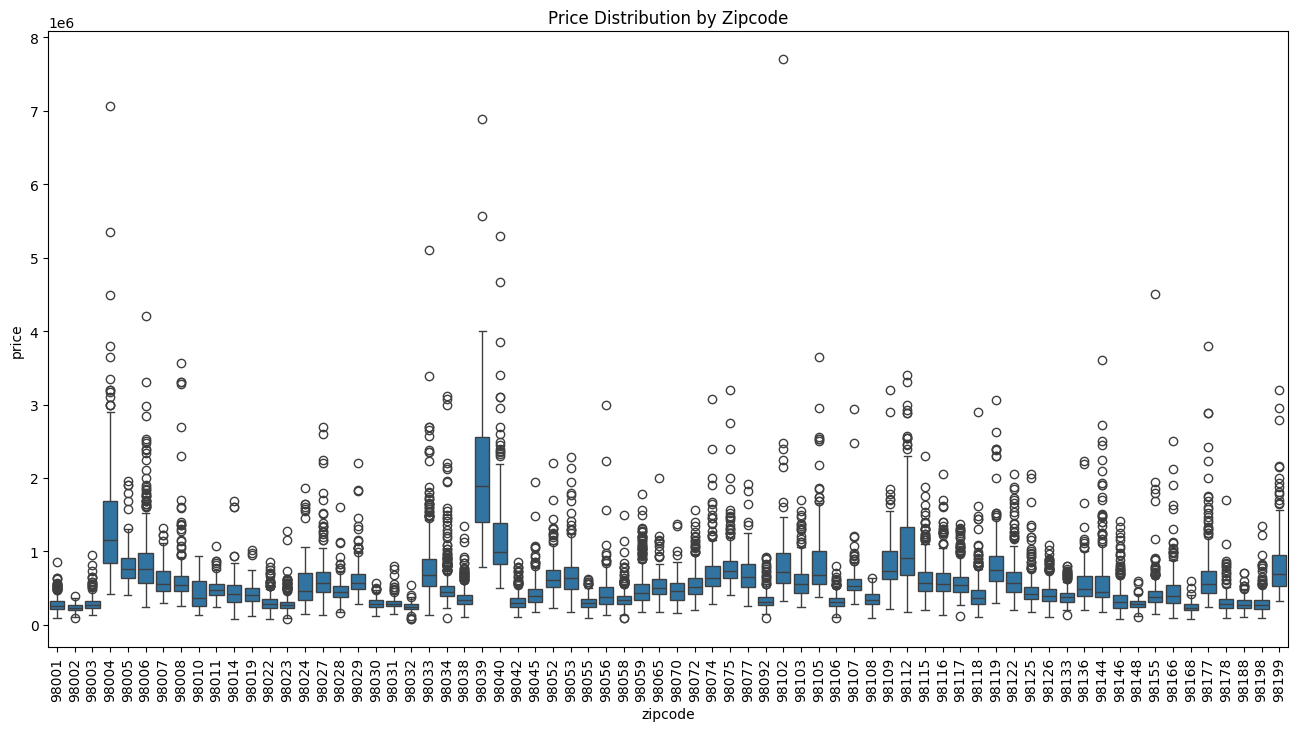

In [48]:
plt.figure(figsize=(16, 8))
sns.boxplot(data=kc_house_data, x="zipcode", y="price")
plt.xticks(rotation=90)
plt.title("Price Distribution by Zipcode")
plt.show()
